Assumptions of Simple Linear Regression

1. There is a linear relationship between X and Y:

* X and Y should display some sort of a linear relationship; otherwise, there is no use of fitting a linear model between them 

2. Error terms are normally distributed with mean zero(not X, Y):

*   There is no problem if the error terms are not normally distributed if you just wish to fit a line and not make any further interpretations.
But if you are willing to make some inferences on the model that you have built you need to have a notion of the distribution of the error terms. 
*   One particular repercussion of the error terms not being normally distributed is that the p-values obtained during the hypothesis test to determine the significance of the coefficients become unreliable. 
*   The assumption of normality is made, as it has been observed that the error terms generally follow a normal distribution with mean equal to zero in most cases.

3. Error terms are independent of each other:

*  The error terms should not be dependent on one another (like in a time-series data wherein the next value is dependent on the previous one).

4. Error terms have constant variance (homoscedasticity):

* The variance should not increase (or decrease) as the error values  change. Also, the variance should not follow any pattern as the error terms change.





 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ml work/advertising.csv')

In [4]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [5]:
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


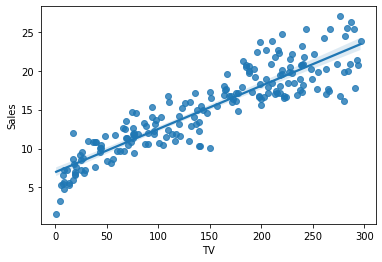

In [7]:
sns.regplot(x='TV',y='Sales', data = df)

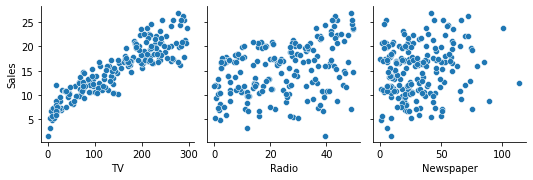

In [8]:
sns.pairplot(data=df , x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [9]:
df.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000

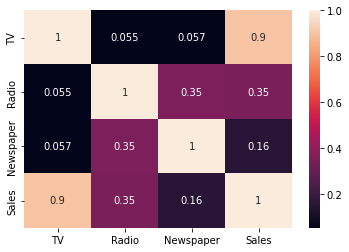

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
import statsmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
import sklearn

# STEPS


1.   Creat x and y
2.   Creat train and test sets (70-30,80-20)
3.   Train the model for Training set(i.e.learn cofficient) the model pera meters
4.   Evaluate the model (training ste , test set) 





In [13]:
x = df.TV
y = df.Sales

In [14]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)



In [15]:
#adding constant as stats model do not include the c constant in the equation Y = mX + c in its model equation
X_train_sm = sm.add_constant(X_train_lm)
X_train_sm.head() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     TV
74     1.0  213.4
3      1.0  151.5
185    1.0  205.0
26     1.0  142.9
90     1.0  134.3

In [16]:
#y = c + m1.x1
#y = c.const + ml.TV

In [25]:
#fitting the model
Lr2 = sm.OLS(y_train_lm,X_train_sm)

In [26]:
lr_model2 = Lr2.fit()

In [32]:
lr_model2.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
#y = 6.94 + 0.054(x)

In [34]:
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.52e-52
Time:                        04:33:07   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Reading the dataset
BS_day = pd.read_csv("/content/drive/MyDrive/ml work/day.csv")

In [39]:
# Let's take a look at the first few rows
BS_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [40]:
# Let's look at the number of rows and columns in the dataset
BS_day.shape

(730, 16)

In [41]:
# Understanding the feature names in the dataset
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [42]:
# Getting insights of the features
BS_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [43]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(BS_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [44]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
BS_day.loc[(BS_day['season'] == 1) , 'season'] = 'spring'

# 2=summer
BS_day.loc[(BS_day['season'] == 2) , 'season'] = 'summer'

# 3=fall
BS_day.loc[(BS_day['season'] == 3) , 'season'] = 'fall'

# 4=winter
BS_day.loc[(BS_day['season'] == 4) , 'season'] = 'winter'

In [45]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
BS_day['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [46]:
# year (0: 2018, 1:2019)
BS_day['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [47]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
BS_day[['mnth']] = BS_day[['mnth']].apply(object_map)

In [48]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
BS_day['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [49]:
# whether day is a holiday or not (0: No, 1: Yes)
BS_day['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [50]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
BS_day[['weekday']] = BS_day[['weekday']].apply(str_map)

In [52]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
BS_day['weekday'].astype('category').value_counts()


Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [53]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
BS_day['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [54]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
BS_day.loc[(BS_day['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
BS_day.loc[(BS_day['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
BS_day.loc[(BS_day['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
BS_day.loc[(BS_day['weathersit'] == 4) , 'weathersit'] = 'D'

In [55]:
# Extracting the type of weather situations present in the data
BS_day['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [56]:
# Taking count based on weather situations
BS_day['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

# Data Visualisation

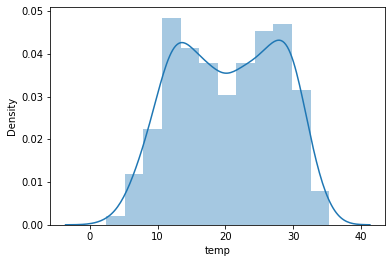

In [57]:
# temperature
sns.distplot(BS_day['temp'])
plt.show()

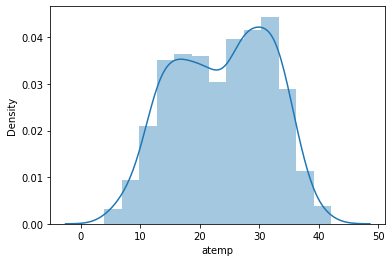

In [58]:
# feeling temperature
sns.distplot(BS_day['atemp'])
plt.show()


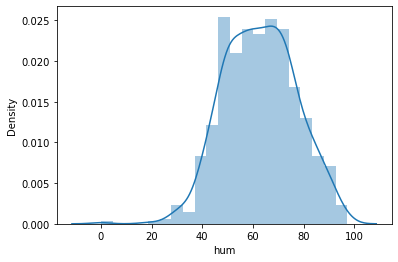

In [59]:
# humidity
sns.distplot(BS_day['hum'])
plt.show()

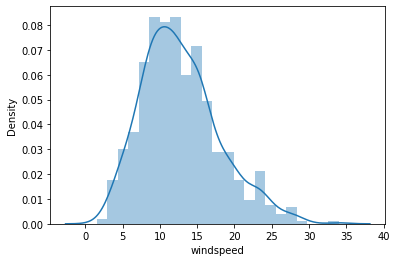

In [60]:
# wind speed
sns.distplot(BS_day['windspeed'])
plt.show()

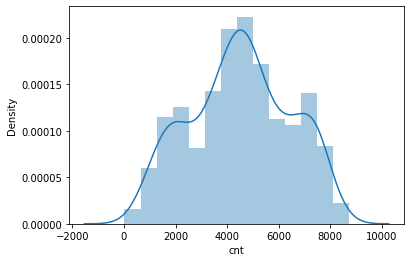

In [61]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(BS_day['cnt'])
plt.show()

In [62]:
# Converting date to datetime format
BS_day['dteday']=BS_day['dteday'].astype('datetime64')

In [63]:
# All categorical variables in the dataset
BS_day_categorical=BS_day.select_dtypes(exclude=['float64','datetime64','int64'])
print(BS_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [64]:
BS_day_categorical

season mnth weekday weathersit
0    spring  Jan     Mon          B
1    spring  Jan    Tues          B
2    spring  Jan     Wed          A
3    spring  Jan   Thurs          A
4    spring  Jan     Fri          A
..      ...  ...     ...        ...
725  spring  Dec     Sat          B
726  spring  Dec     Sun          B
727  spring  Dec     Mon          B
728  spring  Dec    Tues          A
729  spring  Dec     Wed          B

[730 rows x 4 columns]

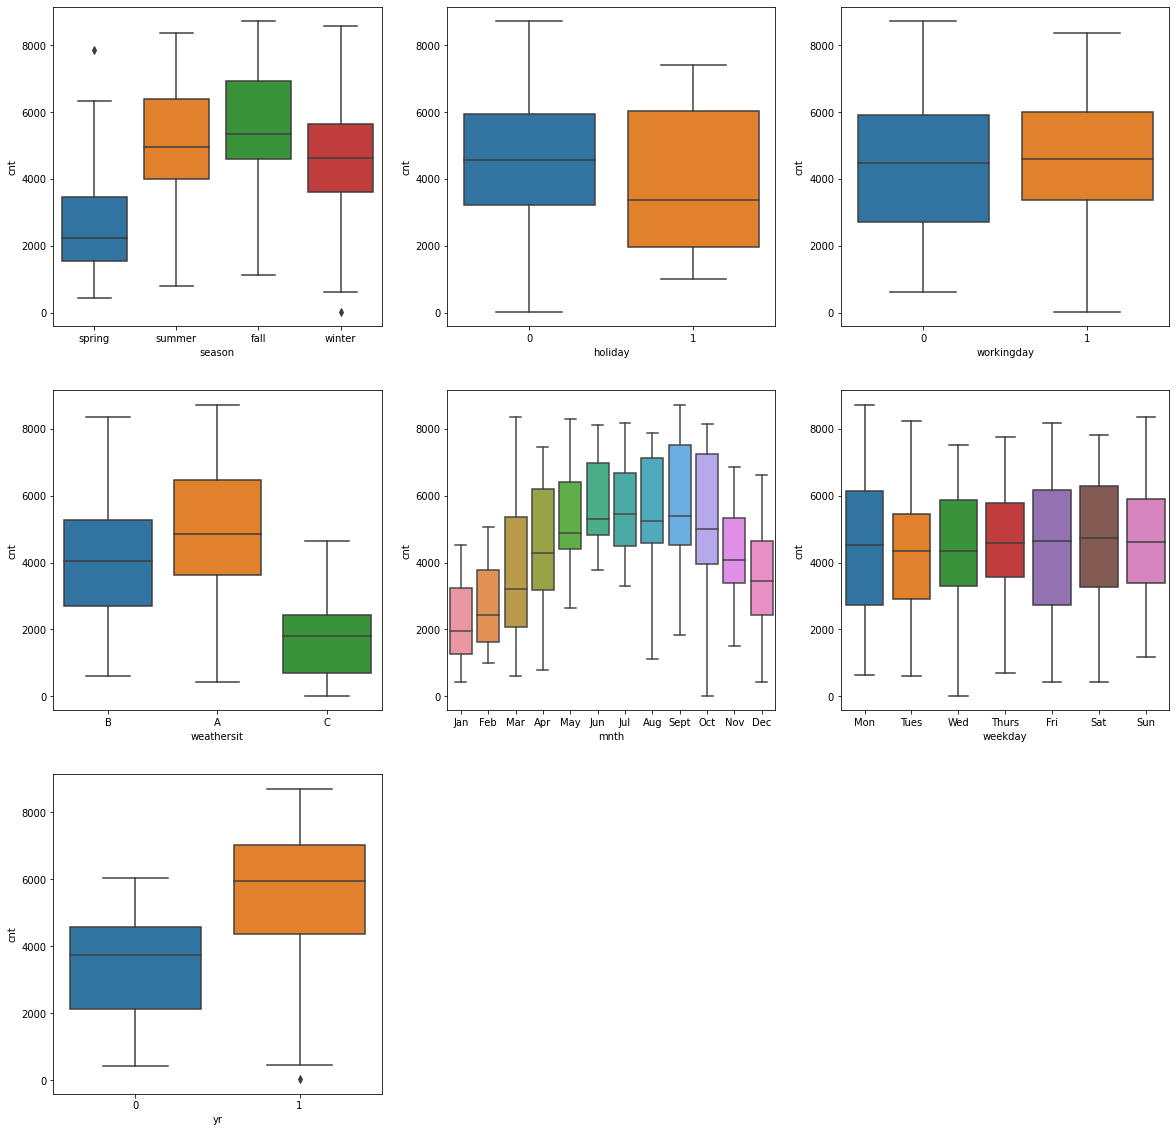

In [65]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_day)
plt.show()
#plt.subplot(3,3,8)
#sns.boxplot(x = 'date', y = 'cnt', data = BS_day)

In [66]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    BS_day[var] = BS_day[var].astype("float")
#BS_day['casual']= BS_day['casual'].astype('float')
#BS_day['registered']=BS_day['registered'].astype('float')
#BS_day['cnt']=BS_day['cnt'].astype('float')
#BS_day.head()

In [67]:
# All numeric variables in the dataset
BS_day_numeric = BS_day.select_dtypes(include=['float64'])
BS_day_numeric.head()

temp     atemp      hum  windspeed  casual  registered     cnt
0  14.110847  18.18125  80.5833  10.749882   331.0       654.0   985.0
1  14.902598  17.68695  69.6087  16.652113   131.0       670.0   801.0
2   8.050924   9.47025  43.7273  16.636703   120.0      1229.0  1349.0
3   8.200000  10.60610  59.0435  10.739832   108.0      1454.0  1562.0
4   9.305237  11.46350  43.6957  12.522300    82.0      1518.0  1600.0

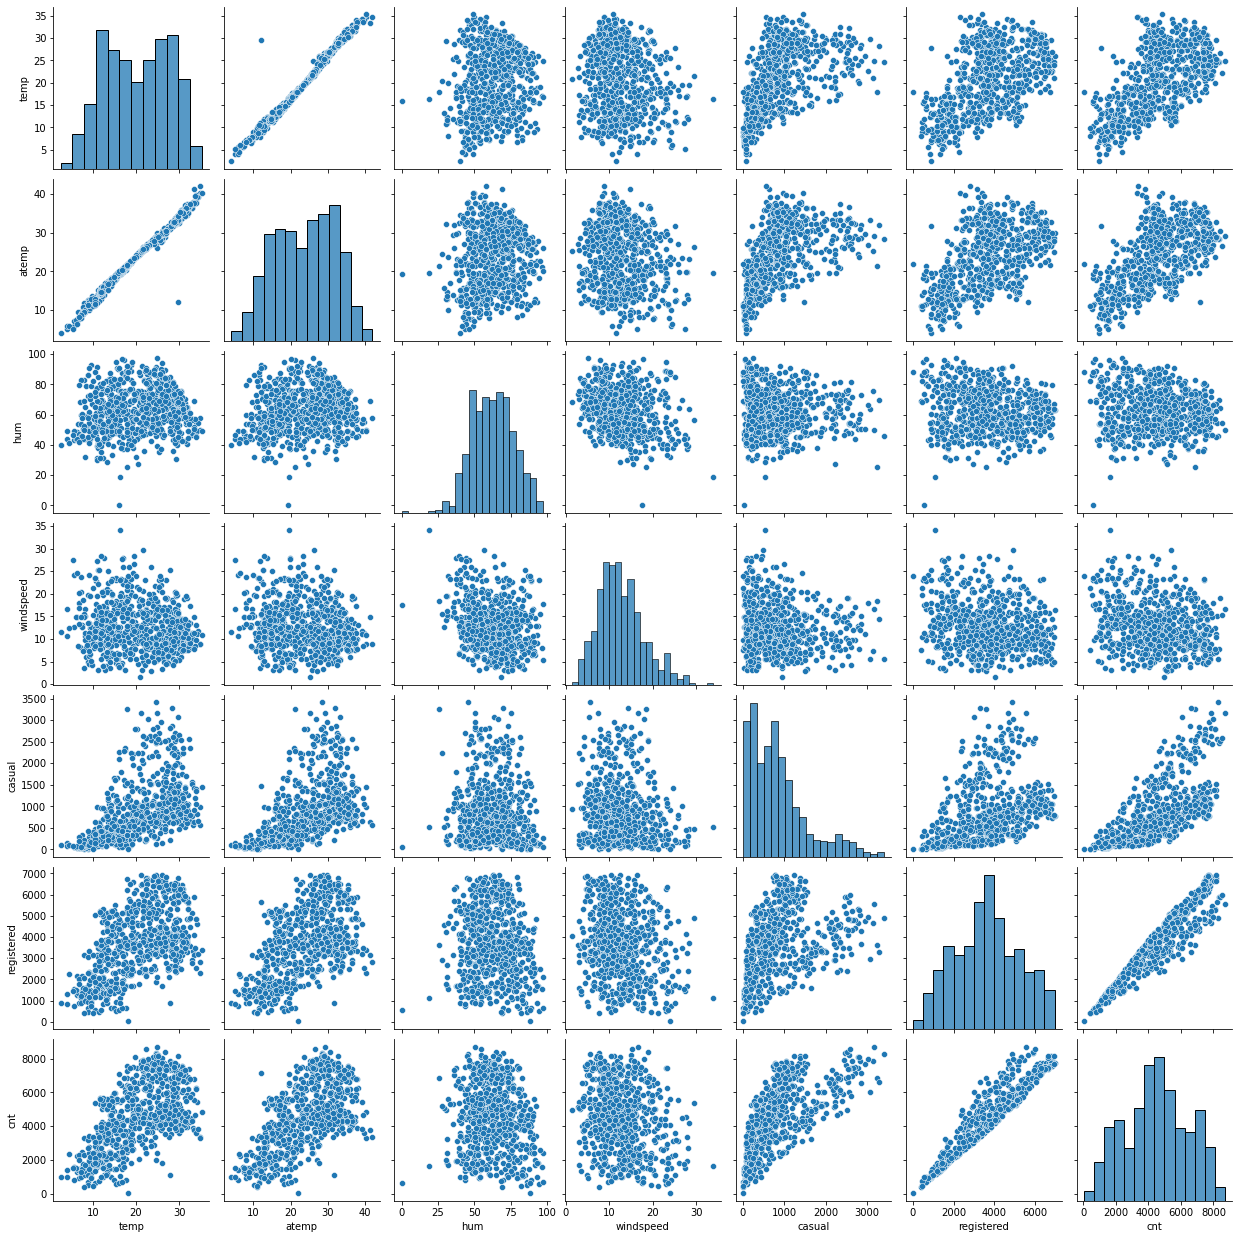

In [68]:
# Pairwise scatter plot
sns.pairplot(BS_day_numeric)
plt.show()

In [69]:
# Correlation matrix
cor = BS_day_numeric.corr()
cor

temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000

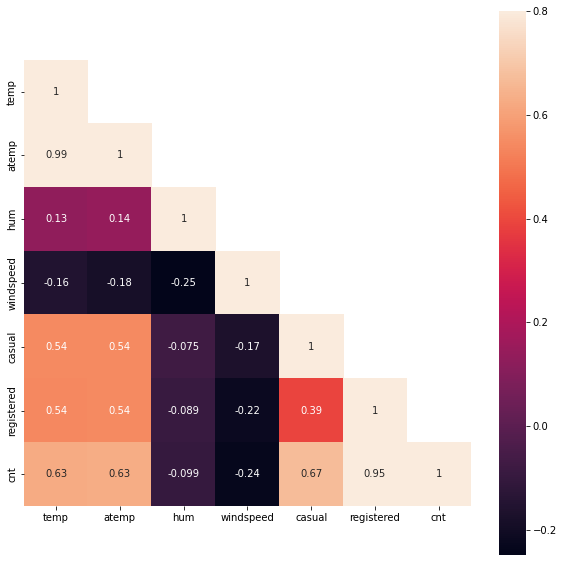

In [70]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

1. The heatmap shows some useful insights:

  Correlation of Count('cnt') with independent variables: 

*   Count('cnt') is highly (positively) correlated with 'casual' and registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

*   Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.


  
2. Correlation among independent variables:

  Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.
Thus, while building the model, we'll have to pay attention to multicollinearity.

In [71]:
#removing atemp as it is highly correlated with temp
BS_day.drop('atemp',axis=1,inplace=True)    

# Data Preparation

In [72]:
# Subset all categorical variables
BS_day_categorical=BS_day.select_dtypes(include=['object'])

In [73]:
# Convert into dummies
BS_day_dummies = pd.get_dummies(BS_day_categorical, drop_first=True)
BS_day_dummies.head()

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  mnth_Oct  mnth_Sept  \
0         1         0         0         0  ...         0          0   
1         1         0         0         0  ...         0          0   
2         1         0         0         0  ...         0          0   
3         1         0         0         0  ...         0          0   
4         1         0         0         0  ...         0          0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
0            1            0            0              0             0   
1            0            0            0              0             1   
2            0            0            0              0             0   
3            0            0            0              1             0   
4            0            0            0              0             0   

   weekday_Wed  weathersit_B  weathersit_C  
0            0             1             0  
1            0             1             0  
2            1             0             0  
3            0             0             0  
4            0             0             0  

[5 rows x 22 columns]

In [74]:
# Drop categorical variable columns
BS_day = BS_day.drop(list(BS_day_categorical.columns), axis=1)

In [75]:
# Concatenate dummy variables with the original dataframe
BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)

In [76]:
# Let's check the first few rows
BS_day.head()

instant     dteday  yr  holiday  workingday       temp      hum  windspeed  \
0        1 2018-01-01   0        0           0  14.110847  80.5833  10.749882   
1        2 2018-02-01   0        0           0  14.902598  69.6087  16.652113   
2        3 2018-03-01   0        0           1   8.050924  43.7273  16.636703   
3        4 2018-04-01   0        0           1   8.200000  59.0435  10.739832   
4        5 2018-05-01   0        0           1   9.305237  43.6957  12.522300   

   casual  registered  ...  mnth_Oct  mnth_Sept  weekday_Mon  weekday_Sat  \
0   331.0       654.0  ...         0          0            1            0   
1   131.0       670.0  ...         0          0            0            0   
2   120.0      1229.0  ...         0          0            0            0   
3   108.0      1454.0  ...         0          0            0            0   
4    82.0      1518.0  ...         0          0            0            0   

   weekday_Sun  weekday_Thurs  weekday_Tues  weekday_Wed  weathersit_B  \
0            0              0             0            0             1   
1            0              0             1            0             1   
2            0              0             0            1             0   
3            0              1             0            0             0   
4            0              0             0            0             0   

   weathersit_C  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 33 columns]

In [77]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day=BS_day.drop(['instant','dteday'], axis = 1, inplace = False)
BS_day.head()

yr  holiday  workingday       temp      hum  windspeed  casual  registered  \
0   0        0           0  14.110847  80.5833  10.749882   331.0       654.0   
1   0        0           0  14.902598  69.6087  16.652113   131.0       670.0   
2   0        0           1   8.050924  43.7273  16.636703   120.0      1229.0   
3   0        0           1   8.200000  59.0435  10.739832   108.0      1454.0   
4   0        0           1   9.305237  43.6957  12.522300    82.0      1518.0   

      cnt  season_spring  ...  mnth_Oct  mnth_Sept  weekday_Mon  weekday_Sat  \
0   985.0              1  ...         0          0            1            0   
1   801.0              1  ...         0          0            0            0   
2  1349.0              1  ...         0          0            0            0   
3  1562.0              1  ...         0          0            0            0   
4  1600.0              1  ...         0          0            0            0   

   weekday_Sun  weekday_Thurs  weekday_Tues  weekday_Wed  weathersit_B  \
0            0              0             0            0             1   
1            0              0             1            0             1   
2            0              0             0            1             0   
3            0              1             0            0             0   
4            0              0             0            0             0   

   weathersit_C  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 31 columns]

# Model Building and Evaluation

In [78]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BS_day, train_size=0.7, test_size=0.3, random_state=100)

In [79]:
df_train

yr  holiday  workingday       temp      hum  windspeed  casual  \
653   1        0           1  19.201653  55.8333  12.208807   922.0   
576   1        0           1  29.246653  70.4167  11.083475   968.0   
426   1        0           0  16.980847  62.1250  10.792293   956.0   
728   1        0           0  10.489153  48.3333  23.500518   364.0   
482   1        0           0  15.443347  48.9583   8.708325  1120.0   
..   ..      ...         ...        ...      ...        ...     ...   
526   1        0           1  29.554153  58.7917  13.916771  1017.0   
578   1        0           1  30.852500  65.9583   8.666718   983.0   
53    0        0           1   9.091299  42.3043   6.305571   139.0   
350   0        0           0  10.591653  56.0833  16.292189   275.0   
79    0        0           1  17.647835  73.7391  19.348461   401.0   

     registered     cnt  season_spring  ...  mnth_Oct  mnth_Sept  weekday_Mon  \
653      6612.0  7534.0              0  ...         1          0            0   
576      6248.0  7216.0              0  ...         0          0            0   
426      3110.0  4066.0              1  ...         0          0            1   
728      1432.0  1796.0              1  ...         0          0            0   
482      3100.0  4220.0              0  ...         0          0            1   
..          ...     ...            ...  ...       ...        ...          ...   
526      5647.0  6664.0              0  ...         0          0            0   
578      6278.0  7261.0              0  ...         0          0            0   
53       1778.0  1917.0              1  ...         0          0            0   
350      2464.0  2739.0              0  ...         0          0            1   
79       1676.0  2077.0              0  ...         0          0            0   

     weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  weekday_Wed  \
653            0            0              1             0            0   
576            0            0              1             0            0   
426            0            0              0             0            0   
728            0            0              0             1            0   
482            0            0              0             0            0   
..           ...          ...            ...           ...          ...   
526            0            0              0             0            1   
578            1            0              0             0            0   
53             0            0              0             0            0   
350            0            0              0             0            0   
79             0            0              0             0            1   

     weathersit_B  weathersit_C  
653             0             0  
576             0             0  
426             1             0  
728             0             0  
482             1             0  
..            ...           ...  
526             1             0  
578             0             0  
53              0             0  
350             1             0  
79              1             0  

[510 rows x 31 columns]

In [80]:
from sklearn.preprocessing import MinMaxScaler 

In [81]:
scaler = MinMaxScaler()

In [82]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [83]:
df_train

yr  holiday  workingday      temp       hum  windspeed    casual  \
653   1        0           1  0.509887  0.575354   0.300794  0.280402   
576   1        0           1  0.815169  0.725633   0.264686  0.294422   
426   1        0           0  0.442393  0.640189   0.255342  0.290765   
728   1        0           0  0.245101  0.498067   0.663106  0.110332   
482   1        0           0  0.395666  0.504508   0.188475  0.340750   
..   ..      ...         ...       ...       ...        ...       ...   
526   1        0           1  0.824514  0.605840   0.355596  0.309357   
578   1        0           1  0.863973  0.679690   0.187140  0.298994   
53    0        0           1  0.202618  0.435939   0.111379  0.041756   
350   0        0           0  0.248216  0.577930   0.431816  0.083206   
79    0        0           1  0.462664  0.759870   0.529881  0.121609   

     registered       cnt  season_spring  ...  mnth_Oct  mnth_Sept  \
653    0.951776  0.864243              0  ...         1          0   
576    0.899220  0.827658              0  ...         0          0   
426    0.446145  0.465255              1  ...         0          0   
728    0.203869  0.204096              1  ...         0          0   
482    0.444701  0.482973              0  ...         0          0   
..          ...       ...            ...  ...       ...        ...   
526    0.812446  0.764151              0  ...         0          0   
578    0.903552  0.832835              0  ...         0          0   
53     0.253826  0.218017              1  ...         0          0   
350    0.352873  0.312586              0  ...         0          0   
79     0.239099  0.236424              0  ...         0          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
653            0            0            0              1             0   
576            0            0            0              1             0   
426            1            0            0              0             0   
728            0            0            0              0             1   
482            1            0            0              0             0   
..           ...          ...          ...            ...           ...   
526            0            0            0              0             0   
578            0            1            0              0             0   
53             0            0            0              0             0   
350            1            0            0              0             0   
79             0            0            0              0             0   

     weekday_Wed  weathersit_B  weathersit_C  
653            0             0             0  
576            0             0             0  
426            0             1             0  
728            0             0             0  
482            0             1             0  
..           ...           ...           ...  
526            1             1             0  
578            0             0             0  
53             0             0             0  
350            0             1             0  
79             1             1             0  

[510 rows x 31 columns]

In [84]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.468282    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           casual  registered         cnt  season_spring  ...    mnth_Oct  \
count  510.000000  510.000000  510.000000     510.000000  ...  510.000000   
mean     0.254661    0.523944    0.513620       0.243137  ...    0.086275   
std      0.206011    0.228175    0.224593       0.429398  ...    0.281045   
min      0.000000    0.000000    0.000000       0.000000  ...    0.000000   
25%      0.094179    0.353487    0.356420       0.000000  ...    0.000000   
50%      0.212740    0.525123    0.518638       0.000000  ...    0.000000   
75%      0.327415    0.696073    0.684710       0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000       1.000000  ...    1.000000   

        mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  \
count  510.000000   510.000000   510.000000   510.000000     510.000000   
mean     0.080392     0.154902     0.133333     0.127451       0.131373   
std      0.272166     0.362166     0.340268     0.333805       0.338139   
min      0.000000     0.000000     0.000000     0.000000       0.000000   
25%      0.000000     0.000000     0.000000     0.000000       0.000000   
50%      0.000000     0.000000     0.000000     0.000000       0.000000   
75%      0.000000     0.000000     0.000000     0.000000       0.000000   
max      1.000000     1.000000     1.000000     1.000000       1.000000   

       weekday_Tues  weekday_Wed  weathersit_B  weathersit_C  
count    510.000000   510.000000    510.000000    510.000000  
mean       0.143137     0.150980      0.343137      0.029412  
std        0.350557     0.358381      0.475223      0.169124  
min        0.000000     0.000000      0.000000      0.000000  
25%        0.000000     0.000000      0.000000      0.000000  
50%        0.000000     0.000000      0.000000      0.000000  
75%        0.000000     0.000000      1.000000      0.000000  
max        1.000000     1.000000      1.000000      1.000000  

[8 rows x 31 columns]

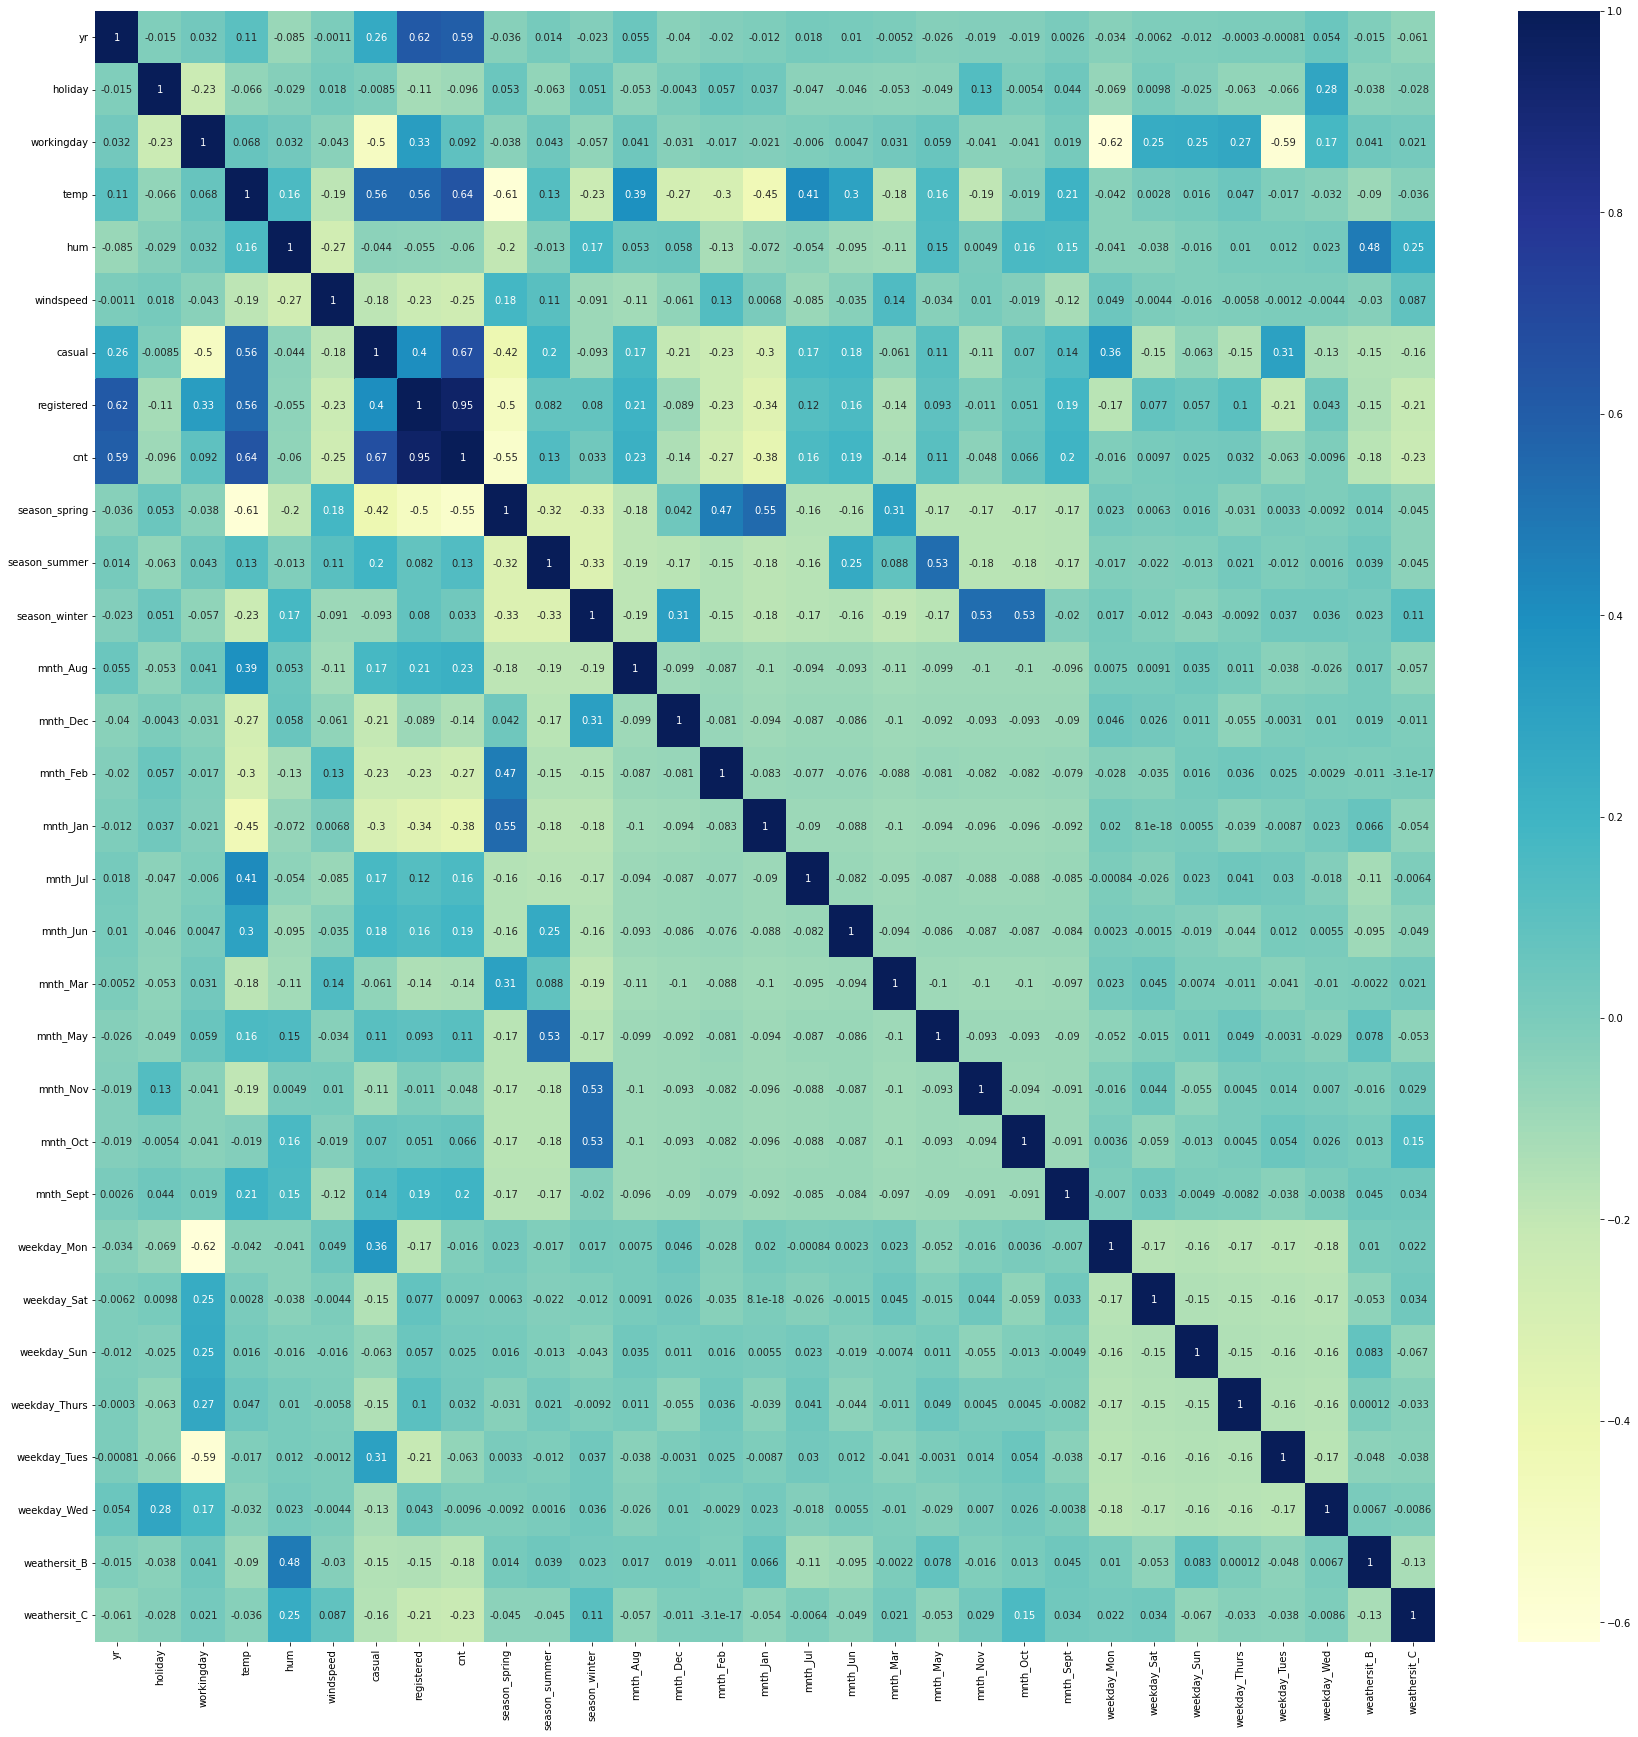

In [85]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

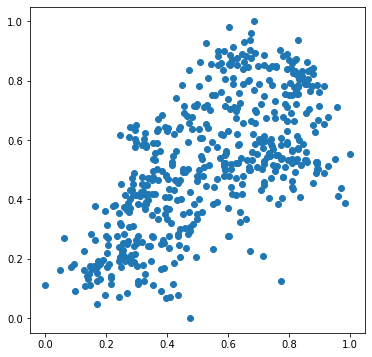

In [86]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [87]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [88]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  season_spring  \
653   1        0           1  0.509887  0.575354   0.300794              0   
576   1        0           1  0.815169  0.725633   0.264686              0   
426   1        0           0  0.442393  0.640189   0.255342              1   
728   1        0           0  0.245101  0.498067   0.663106              1   
482   1        0           0  0.395666  0.504508   0.188475              0   

     season_summer  season_winter  mnth_Aug  ...  mnth_Oct  mnth_Sept  \
653              0              1         0  ...         1          0   
576              0              0         0  ...         0          0   
426              0              0         0  ...         0          0   
728              0              0         0  ...         0          0   
482              1              0         0  ...         0          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
653            0            0            0              1             0   
576            0            0            0              1             0   
426            1            0            0              0             0   
728            0            0            0              0             1   
482            1            0            0              0             0   

     weekday_Wed  weathersit_B  weathersit_C  
653            0             0             0  
576            0             0             0  
426            0             1             0  
728            0             0             0  
482            0             1             0  

[5 rows x 28 columns]

In [89]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [91]:
X_train.shape

(510, 28)

### Using all features

In [92]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thurs   -0.013502
weekday_Tues     0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [93]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [94]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.32115721e-01  1.61258967e+12  1.61258967e+12  4.48336194e-01
 -1.52428022e-01 -1.92699382e-01 -3.85433597e-02  4.70535949e-02
  1.09320712e-01  2.29579840e-02 -4.83521561e-02 -3.38347352e-02
 -6.68984857e-02 -3.53539793e-02 -4.53031896e-03 -6.58406020e-03
  2.29928876e-02 -3.73840332e-02  9.97924805e-03  8.40263367e-02
  1.61258967e+12 -1.94549561e-03  4.73022461e-03 -1.88889503e-02
  1.61258967e+12 -1.45263672e-02 -6.15539551e-02 -2.57446289e-01]
-1612589669826.2068


In [95]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 25 Apr 2022   Prob (F-statistic):          8.74e-182
Time:                        06:23:58   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854      0.000       0.173       0.313
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0937      0.012      7.783      0.000       0.070       0.117
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon       0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat      -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun       0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs    -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues      0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed      -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     7.06e+15
================================================================

### Model Building Using RFE
* Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the statsmodels library to build models using the shortlisted features (this is also because SKLearn doesn't have Adjusted R-squared that statsmodels has).

In [99]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()


In [102]:
rfe1 = RFE(lm)

# Fit with 15 features
rfe1.fit(X_train, y_train)

 

RFE(estimator=LinearRegression())

In [103]:
# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True  True  True  True  True  True  True False  True False False False
 False  True False False False False False  True  True False False False
  True False  True  True]
[ 1  1  1  1  1  1  1  2  1 10  5  6  3  1 12 14  7  4 13  1  1 15 11  9
  1  8  1  1]


In [104]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const  yr  holiday  workingday      temp       hum  windspeed  \
653    1.0   1        0           1  0.509887  0.575354   0.300794   
576    1.0   1        0           1  0.815169  0.725633   0.264686   
426    1.0   1        0           0  0.442393  0.640189   0.255342   
728    1.0   1        0           0  0.245101  0.498067   0.663106   
482    1.0   1        0           0  0.395666  0.504508   0.188475   

     season_spring  season_winter  mnth_Jul  mnth_Sept  weekday_Mon  \
653              0              1         0          0            0   
576              0              0         1          0            0   
426              1              0         0          0            1   
728              1              0         0          0            0   
482              0              0         0          0            1   

     weekday_Tues  weathersit_B  weathersit_C  
653             0             0             0  
576             0             0             0  
426             0             1             0  
728             1             0             0  
482             0             1             0

In [105]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 25 Apr 2022   Prob (F-statistic):          3.81e-190
Time:                        07:19:18   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2418      0.025      9.590

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
a=X_train_rfe1.drop('const',axis=1)

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2      workingday  40.71
10    weekday_Mon   9.93
11   weekday_Tues   9.64
3            temp   2.99
6   season_spring   2.55
1         holiday   2.54
4             hum   1.89
7   season_winter   1.78
12   weathersit_B   1.57
8        mnth_Jul   1.30
13   weathersit_C   1.25
5       windspeed   1.17
9       mnth_Sept   1.11
0              yr   1.03

In [114]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm,n_features_to_select=7)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True False False False False False False False False
 False False False False False False False False  True False False False
  True False False  True]
[ 1  1  1  1  3  2  4  9  8 17 12 13 10  5 19 21 14 11 20  7  1 22 18 16
  1 15  6  1]


In [116]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

const  yr  holiday  workingday      temp  weekday_Mon  weekday_Tues  \
653    1.0   1        0           1  0.509887            0             0   
576    1.0   1        0           1  0.815169            0             0   
426    1.0   1        0           0  0.442393            1             0   
728    1.0   1        0           0  0.245101            0             1   
482    1.0   1        0           0  0.395666            1             0   

     weathersit_C  
653             0  
576             0  
426             0  
728             0  
482             0

In [117]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     224.0
Date:                Mon, 25 Apr 2022   Prob (F-statistic):          1.41e-138
Time:                        07:25:05   Log-Likelihood:                 370.22
No. Observations:                 510   AIC:                            -726.4
Df Residuals:                     503   BIC:                            -696.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0578      0.013      4.579   

In [118]:
b=X_train_rfe2.drop('const',axis=1)

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2    workingday  5.51
4   weekday_Mon  1.91
5  weekday_Tues  1.88
1       holiday  1.11
0            yr  1.02
3          temp  1.02
6  weathersit_C  1.01

In [121]:
# Let's drop the 'hum' column
X_train_rfe2.drop("workingday",axis=1,inplace=True)
X_train_rfe2

const  yr  holiday      temp  weekday_Mon  weekday_Tues  weathersit_C
653    1.0   1        0  0.509887            0             0             0
576    1.0   1        0  0.815169            0             0             0
426    1.0   1        0  0.442393            1             0             0
728    1.0   1        0  0.245101            0             1             0
482    1.0   1        0  0.395666            1             0             0
..     ...  ..      ...       ...          ...           ...           ...
526    1.0   1        0  0.824514            0             0             0
578    1.0   1        0  0.863973            0             0             0
53     1.0   0        0  0.202618            0             0             0
350    1.0   0        0  0.248216            1             0             0
79     1.0   0        0  0.462664            0             0             0

[510 rows x 7 columns]

In [122]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     224.0
Date:                Mon, 25 Apr 2022   Prob (F-statistic):          1.41e-138
Time:                        07:26:13   Log-Likelihood:                 370.22
No. Observations:                 510   AIC:                            -726.4
Df Residuals:                     503   BIC:                            -696.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1003      0.015      6.734   

In [123]:
c=X_train_rfe2.drop('const',axis=1)

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  2.19
0            yr  1.90
3   weekday_Mon  1.17
4  weekday_Tues  1.16
1       holiday  1.02
5  weathersit_C  1.02

All the VIF values and p-values seem to be in the permissible range now. Also the Adjusted R-squared value has dropped from 84.5% with 28 variables to just 79.1% using 6 variables. This model is explaining most of the variance without being too complex. So let's proceed with this model.

# Residual Analysis
Before we make predictions on the test set, let's first analyse the residuals.

In [125]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

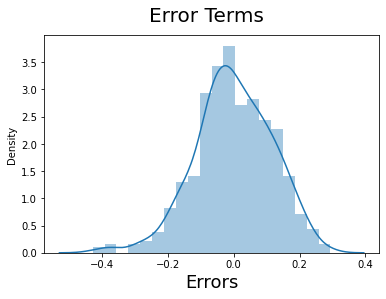

In [126]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)     

In [127]:
X_train_rfe2

const  yr  holiday      temp  weekday_Mon  weekday_Tues  weathersit_C
653    1.0   1        0  0.509887            0             0             0
576    1.0   1        0  0.815169            0             0             0
426    1.0   1        0  0.442393            1             0             0
728    1.0   1        0  0.245101            0             1             0
482    1.0   1        0  0.395666            1             0             0
..     ...  ..      ...       ...          ...           ...           ...
526    1.0   1        0  0.824514            0             0             0
578    1.0   1        0  0.863973            0             0             0
53     1.0   0        0  0.202618            0             0             0
350    1.0   0        0  0.248216            1             0             0
79     1.0   0        0  0.462664            0             0             0

[510 rows x 7 columns]

In [128]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [129]:
df_test[var] = scaler.transform(df_test[var])

In [130]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [131]:
X_test.head()

yr  holiday  workingday      temp       hum  windspeed  season_spring  \
184   0        1           0  0.831783  0.657364   0.084219              0   
535   1        0           1  0.901354  0.610133   0.153728              0   
299   0        0           1  0.511964  0.837699   0.334206              0   
221   0        0           1  0.881625  0.437098   0.339570              0   
152   0        0           1  0.817246  0.314298   0.537414              0   

     season_summer  season_winter  mnth_Aug  ...  mnth_Oct  mnth_Sept  \
184              0              0         0  ...         0          0   
535              1              0         0  ...         0          0   
299              0              1         0  ...         1          0   
221              0              0         1  ...         0          0   
152              1              0         0  ...         0          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
184            0            0            0              0             0   
535            0            0            0              0             0   
299            0            1            0              0             0   
221            0            0            0              0             0   
152            0            1            0              0             0   

     weekday_Wed  weathersit_B  weathersit_C  
184            1             1             0  
535            0             0             0  
299            0             1             0  
221            0             0             0  
152            0             0             0  

[5 rows x 28 columns]

In [132]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['yr', 'holiday', 'temp', 'weekday_Mon', 'weekday_Tues', 'weathersit_C'], dtype='object')

In [133]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [134]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   weekday_Mon   219 non-null    uint8  
 5   weekday_Tues  219 non-null    uint8  
 6   weathersit_C  219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(3)
memory usage: 9.2 KB


In [135]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

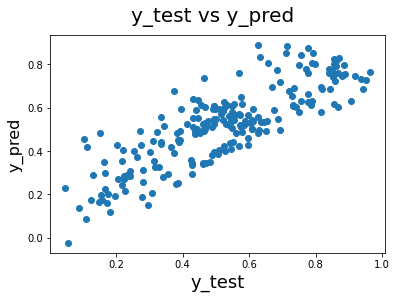

In [136]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [137]:
#From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [138]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6983957256155087

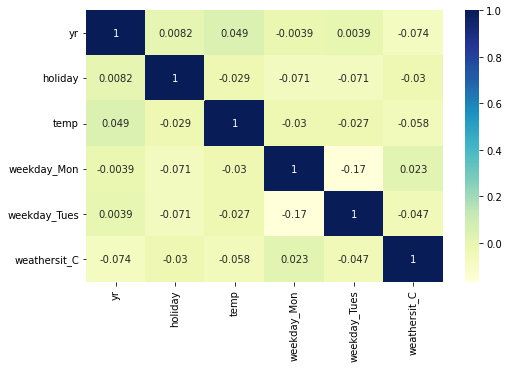

In [139]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(BS_day[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()